# Training and Testing an MDRNN on Synthetic Data

This script trains and tests a mixture density recurrent neural network (MDRNN) on synthetic performances.

Ideas to investigate:

- give the data a variety of periods instead of 15000 samples in the same
- save all the waves together (done)

In [2]:
%matplotlib inline
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import pandas as pd
import time

## Parameters for time distribution (found from studying human sourced data)
time_mean = 0.044860
time_std = 0.183995
time_min = 0.000454
time_max = 8.463944
NSAMPLE = 15000



## Generating Fake data:

The idea is to generate some data that "could" have been human, but has a regular pattern. The time axis is sampled from a normal distribution with the same mean and S.D. as the human corpus. The value axis is generated by applying regular signal functions (e.g., sine, square, triangle) to this time axis.


In [ ]:
# Generate fake Sine movement
t_diffs = np.random.normal(loc=time_mean, scale=time_std, size=NSAMPLE)

sine_df = pd.DataFrame({'dt' : t_diffs})
sine_df.dt = sine_df.dt.abs()
sine_df['seconds'] = sine_df.dt.cumsum()
sine_df['value'] = (np.sin(sine_df.seconds) * 0.5) + 0.5
display(sine_df.describe())

ax = sine_df[:1000].plot(x='seconds', y='value', kind="line", figsize=(15,4), legend=False)
ax.set_xlabel("seconds")
ax.set_ylabel("position")
ax.get_figure().savefig('../images/sine_data_output.pdf', dpi=300, bbox_inches="tight")
ax.get_figure().savefig('../images/sine_data_output.png', dpi=300, bbox_inches="tight")

In [ ]:
# Generate fake Squarey Movement
t_diffs = np.random.normal(loc=time_mean, scale=time_std, size=NSAMPLE)

square_df = pd.DataFrame({'dt' : t_diffs})
square_df.dt = square_df.dt.abs()
square_df['seconds'] = square_df.dt.cumsum()
square_df['value'] = (scipy.signal.square(square_df.seconds) * 0.5) + 0.5
display(square_df.describe())

ax = square_df[:1000].plot(x='seconds', y='value', kind="line", figsize=(15,4), legend=False)
ax.set_xlabel("seconds")
ax.set_ylabel("position")
ax.get_figure().savefig('../images/square_data_output.pdf', dpi=300, bbox_inches="tight")
ax.get_figure().savefig('../images/square_data_output.png', dpi=300, bbox_inches="tight")

In [ ]:
# Generate fake triangle-y Movement
t_diffs = np.random.normal(loc=time_mean, scale=time_std, size=NSAMPLE)

tri_df = pd.DataFrame({'dt' : t_diffs})
tri_df.dt = tri_df.dt.abs()
tri_df['seconds'] = tri_df.dt.cumsum()
tri_df['value'] = (scipy.signal.sawtooth(tri_df.seconds, width=0.5) * 0.5) + 0.5
display(tri_df.describe())

ax = tri_df[:1000].plot(x='seconds', y='value', kind="line", figsize=(15,4), legend=False)
ax.set_xlabel("seconds")
ax.set_ylabel("position")
ax.get_figure().savefig('../images/tri_data_output.pdf', dpi=300, bbox_inches="tight")
ax.get_figure().savefig('../images/tri_data_output.png', dpi=300, bbox_inches="tight")

,dt,value,seconds
count,15000.000000,15000.000000,15000.000000
mean,0.152315,0.497090,1137.400267
std,0.114710,0.288421,660.371093
min,0.000019,0.000079,0.002134
25%,0.061070,0.246115,560.177274
50%,0.129469,0.497795,1134.702400
75%,0.220623,0.746048,1711.093956
max,0.770733,0.999997,2284.725996


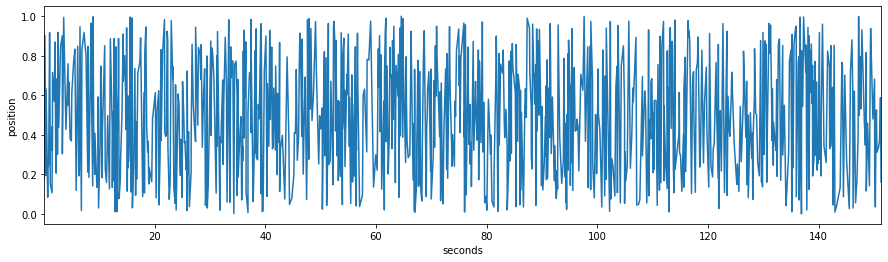

In [6]:
# Generate noise
t_diffs = np.random.normal(loc=time_mean, scale=time_std, size=NSAMPLE)
values = np.random.uniform(low=0.0, high=1.0, size=NSAMPLE)

noise_df = pd.DataFrame({'dt' : t_diffs, 'value' : values})
noise_df.dt = noise_df.dt.abs()
noise_df['seconds'] = noise_df.dt.cumsum()

display(noise_df.describe())

ax = noise_df[:1000].plot(x='seconds', y='value', kind="line", figsize=(15,4), legend=False)
ax.set_xlabel("seconds")
ax.set_ylabel("position")
ax.get_figure().savefig('../images/noise_data_output.pdf', dpi=300, bbox_inches="tight")
ax.get_figure().savefig('../images/noise_data_output.png', dpi=300, bbox_inches="tight")

### Save corpora into a specific data file to access during training.

In [ ]:
# Save synthetic Data in a compressed numpy file.
dataset_location = '../datasets/'
dataset_filename = 'empi-synthetic-dataset.npz'

generated_logs = [
    sine_df,
    tri_df,
    square_df
]

def transform_log_to_sequence_example(perf_df):
    """Don't have to do much work here..."""
    return np.array(perf_df[['dt', 'value']])

log_arrays = [transform_log_to_sequence_example(log_df) for log_df in generated_logs]



## Generate some stats and convert to compressed formats.
raw_perfs = []
acc = 0
time = 0
interactions = 0
for l in log_arrays:
    acc += l.shape[0] * l.shape[1]
    interactions += l.shape[0]
    time += l.T[0].sum()
    raw = l.astype('float32')  # dt, x_1, ... , x_n
    raw_perfs.append(raw)

print("total number of values:", acc)
print("total number of interactions:", interactions)
print("total time represented:", time, "seconds")
print("total number of perfs in raw array:", len(raw_perfs))
raw_perfs = np.array(raw_perfs)
np.savez_compressed(dataset_location + dataset_filename, perfs=raw_perfs)
print("done saving:", dataset_location + dataset_filename)

In [7]:
# Save noise Data in a compressed numpy file.
dataset_location = '../datasets/'
dataset_filename = 'empi-noise-dataset.npz'

generated_logs = [noise_df]
log_arrays = [np.array(log_df[['dt', 'value']]) for log_df in generated_logs]

## Generate some stats and convert to compressed formats.
raw_perfs = []
acc = 0
time = 0
interactions = 0
for l in log_arrays:
    acc += l.shape[0] * l.shape[1]
    interactions += l.shape[0]
    time += l.T[0].sum()
    raw = l.astype('float32')  # dt, x_1, ... , x_n
    raw_perfs.append(raw)

print("total number of values:", acc)
print("total number of interactions:", interactions)
print("total time represented:", time, "seconds")
print("total number of perfs in raw array:", len(raw_perfs))
raw_perfs = np.array(raw_perfs)
np.savez_compressed(dataset_location + dataset_filename, perfs=raw_perfs)
print("done saving:", dataset_location + dataset_filename)

total number of values: 30000
total number of interactions: 15000
total time represented: 2284.7259957725682 seconds
total number of perfs in raw array: 1
done saving: ../datasets/empi-noise-dataset.npz


Now the generated data is ready for training.

# Train networks with the Synthetic data

Training an MDN with these synthetic data sets.

### Here are the corpora

- square_corpus
- tri_corpus
- sine_corpus

In [ ]:
# Hyperparameters
units = 256
mixes = 8
layers = 1
batch_s = 100
n_steps = 120
epochs = 1
 n x
# Train
net = sketch_mdn.MixtureRNN(mode = sketch_mdn.NET_MODE_TRAIN, 
                            n_hidden_units=units, 
                            n_mixtures=mixes, 
                            batch_size=batch_s, 
                            sequence_length=n_steps, 
                            layers=layers)
loader = sketch_mdn.SequenceDataLoader(num_steps=(n_steps + 1), batch_size=batch_s, corpus=tri_corpus)
losses = net.train(loader, epochs, saving=True)
## Plot the losses.
plt.plot(losses)
plt.show()

## Investigate some generated data:



In [ ]:
# Hyperparameters
units = 128
mixes = 8
layers = 3
batch_s = 1
n_steps = 1

# Instantiate Running Network
net = sketch_mdn.MixtureRNN(mode = sketch_mdn.NET_MODE_RUN, 
                            n_hidden_units=units, 
                            n_mixtures=mixes, 
                            batch_size=batch_s, 
                            sequence_length=n_steps, 
                            layers=layers)

first_touch = np.array([(0.01 + (np.random.rand()-0.5)*0.005), np.random.rand()])
print("Test Input:",first_touch)

with tf.Session() as sess:
    perf = net.generate_performance(first_touch,2000,sess)
print("Test Output:")
perf_df = pd.DataFrame({'dt':perf.T[0], 'value':perf.T[1]})
perf_df['seconds'] = perf_df.dt.cumsum()

print(perf_df.describe())

ax = perf_df[:2000].plot(x='seconds', y='value', kind="line", figsize=(15,4), legend=False, color='r')
ax.set_xlabel("seconds")
ax.set_ylabel("position")
ax.set_ylim([-0.1,1.1])
ax.get_figure().savefig('synthetic_net_output.pdf', dpi=300, bbox_inches="tight")
ax.get_figure().savefig('synthetic_net_output.png', dpi=300, bbox_inches="tight")

In [ ]:
# Hyperparameters
units = 128
mixes = 8
layers = 3
batch_s = 1
n_steps = 1

# Instantiate Running Network
net = sketch_mdn.MixtureRNN(mode = sketch_mdn.NET_MODE_RUN, 
                            n_hidden_units=units, 
                            n_mixtures=mixes, 
                            batch_size=batch_s, 
                            sequence_length=n_steps, 
                            layers=layers)



In [ ]:
net.freeze_model()

In [ ]:
[n.name for n in tf.get_default_graph().as_graph_def().node]

In [ ]:

ax = perf_df[:1000].plot(x='seconds', y='value', kind="line", figsize=(15,4), legend=False)
ax.set_xlabel("seconds")
ax.set_ylabel("position")
ax.set_ylim([-0.1,1.1])
ax.get_figure().savefig('synth_net_output.pdf', dpi=300, bbox_inches="tight")
ax.get_figure().savefig('synth_net_output.png', dpi=300, bbox_inches="tight")

